
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Екатерина Демидова, Data Scientist @ Segmento. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: 

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs). Скачайте [данные](https://drive.google.com/file/d/1nV2qV9otN3LnVSDqy95hvpJdb6aWtATk/view?usp=sharing) соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [2]:
# При необходимости поменяйте путь к данным
df = pd.read_csv("data/howpop_train.csv")

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
# Избавляет от необходимости сохранять датасет
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
# Бинарные и категориальные переменные
df.describe(include=["object", "bool"]).T  

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/283482/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# Настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (30, 10), "axes.titlesize": 14}
)

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
# Наводим суету в датасете
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]
df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]
df["day"] = [d.day for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

[2189, 2110, 2115, 1910]


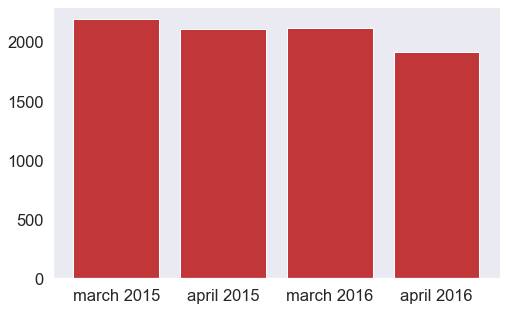

In [11]:
df_march = df[df['month']==3]
df_april = df[df['month']==4]

x = ['march 2015', 'april 2015', 'march 2016', 'april 2016']
y = [len(df_march[df_march['year']==2015]), len(df_april[df_april['year']==2015]), \
     len(df_march[df_march['year']==2016]), len(df_april[df_april['year']==2016])]

plt.bar(x,y)
print(y)

# Очевидно, март 2015

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

C:\Users\nizov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

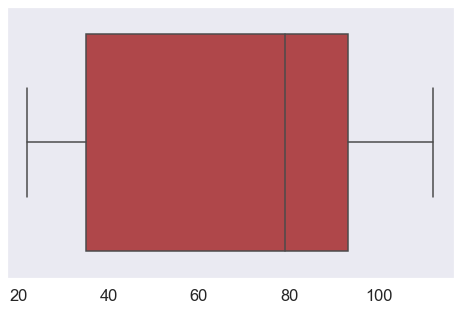

In [12]:
ds1 = df_march[df_march['year']==2015]
sns.boxplot(ds1.groupby('day').size())
# То же самое но только чисто с пандой:
# (ds1.groupby('day').size()).plot.box() 

# Судя по boxplot-у, выбросов (точек) нет.

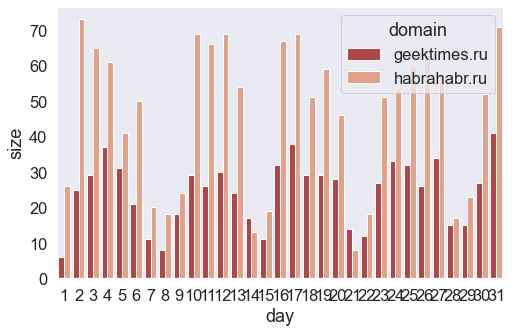

In [13]:
ds1['domain'].unique()
ds1_grouped = ds1.groupby(['day', 'domain'], as_index=False).size()
ax = sns.barplot(x='day', y='size', hue='domain', data=ds1_grouped)

# Есть дни, когда у geektimes публикаций больше (например, 14 число)

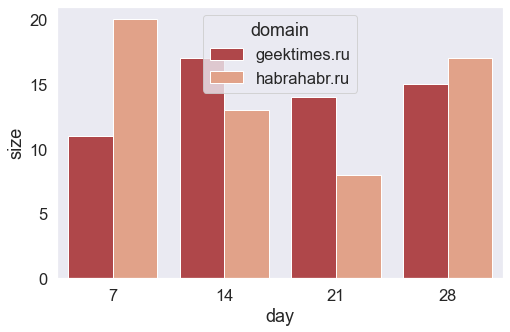

In [14]:
sat_ds = ds1[ds1['dayofweek']==6]
sat_pubs = sat_ds.groupby(['day','domain'], as_index=False).size()
ax = sns.barplot(x='day', y='size', hue='domain', data=sat_pubs)

# Да, по сб "примерно" одинаково (хотя для кого как, вообще-то)

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

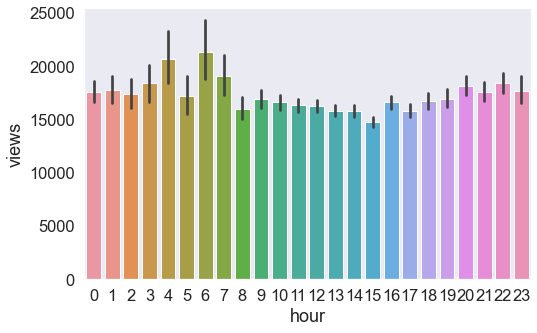

In [15]:
ax1 = sns.barplot(x='hour', y='views', data=df)

# Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - нет
# Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - да

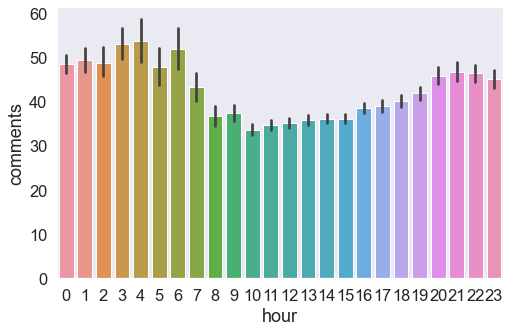

In [16]:
ax2 = sns.barplot(x='hour', y='comments', data=df)

# У опубликованных в 10 утра постов больше всего комментариев - нет

In [17]:
df_geektimes = df[df['domain']=='geektimes.ru']
max_comments_index = df_geektimes['comments'].idxmax()
df_geektimes.loc[[max_comments_index], ['hour']]

# Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - нет

,hour
38763,2


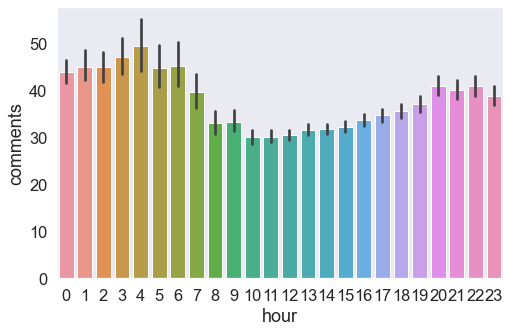

In [18]:
df_habr = df[df['domain']=='habrahabr.ru']
ax3 = sns.barplot(x='hour', y='comments', data=df_habr)

# На хабре дневные статьи комментируют чаще, чем вечерние - нет

## 4\. Кого из топ-20 авторов (по числу статей) чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [21]:
# Выделяем топ самых популярных авторов
df_author_top = df.groupby('author', as_index=False).size()
df_author_top.sort_values('size', ascending=False, inplace=True)
df_author_top20 = df_author_top.head(20)
# Список этих 20 людей
val_list = df_author_top20['author'].unique().tolist()

# Сортируем авторов по дизлайкам
df_author = df.groupby('author', as_index=False)[['votes_minus']].sum()

# Делаем слияние - каждому автору из датафрейма с дизлайками приписываем количество его публикаций
df_combined = df_author.join(df_author_top, rsuffix='1')
# "чаще всего минусуют" - это сколько в среднем лайков на статью?
df_combined['freq'] = df_combined['votes_minus']/df_combined['size']

# Оставляем только людей из топ-20
df_combined = df_combined[df_combined.author.isin(val_list)]
df_combined.sort_values('freq', ascending=False, inplace=True)
# Ответ
df_combined.head(1)

# Это @Mithgol

,author,votes_minus,author1,size,freq
5215,@Mithgol,11367.0,@Mithgol,560,20.298214


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [150]:
df_sat = df[df['dayofweek']==6]
df_mon = df[df['dayofweek']==1]

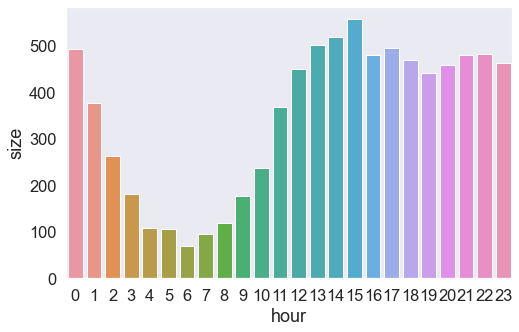

In [151]:
df_sat_count = df_sat.groupby('hour', as_index=False).size()
ax3 = sns.barplot(x='hour', y='size', data=df_sat_count)

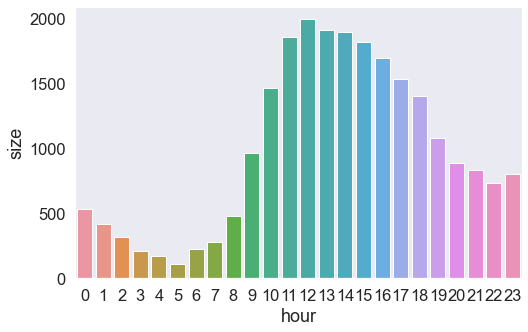

In [153]:
df_mon_count = df_mon.groupby('hour', as_index=False).size()
ax4 = sns.barplot(x='hour', y='size', data=df_mon_count)

In [ ]:
# Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером? - нет